In [1]:
import cv2
import matplotlib.pyplot as plt 

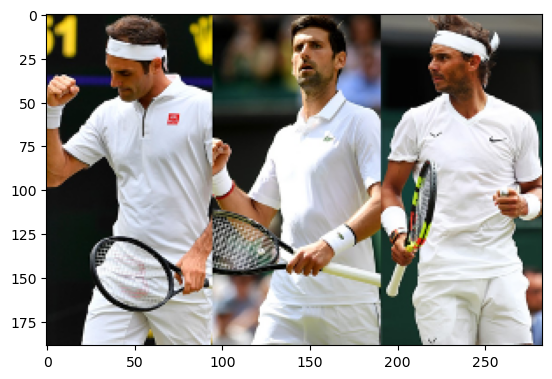

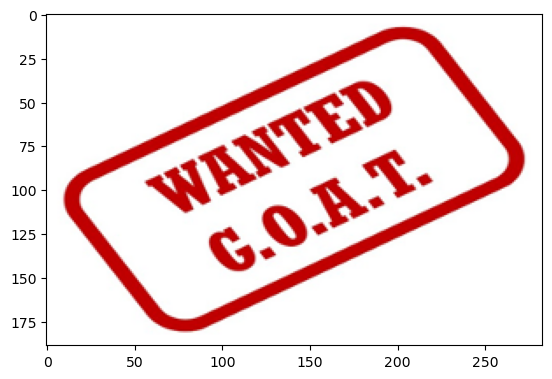

In [2]:
sample_img = cv2.imread('../Data/ex_image.png')
sample_logo = cv2.imread('../Data/ex_image_logo.png')

sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
sample_logo = cv2.cvtColor(sample_logo, cv2.COLOR_BGR2RGB)

plt.imshow(sample_img)
plt.show()

plt.imshow(sample_logo)
plt.show()

(600, 800, 3) (600, 800, 3)


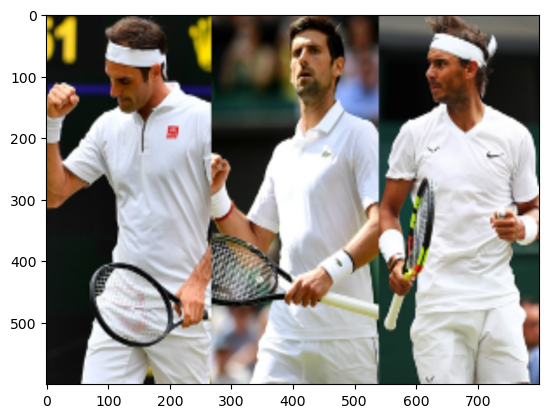

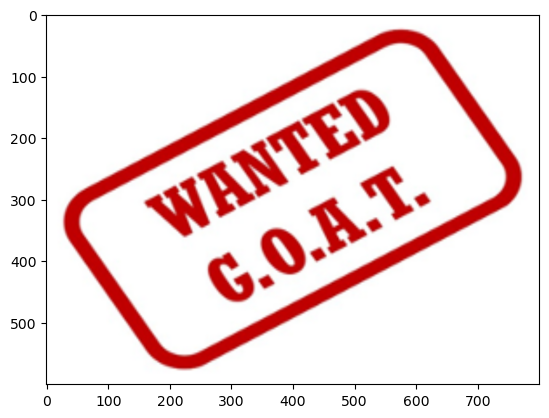

In [3]:
img1 = cv2.resize(sample_img, (800, 600))
img2 = cv2.resize(sample_logo, (800, 600))

print(img1.shape, img2.shape)

#수정된 이미지 체크
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()

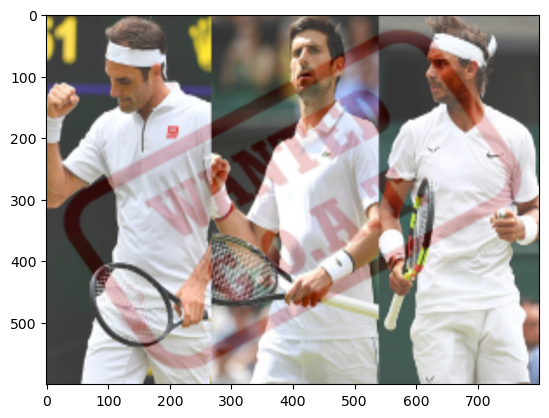

In [4]:
blended = cv2. addWeighted(img1, 0.8, img2, 0.2, 0) #동일한 크기의 사진에서만 작용하는 addWeighted 함수

plt.imshow(blended)
plt.show()

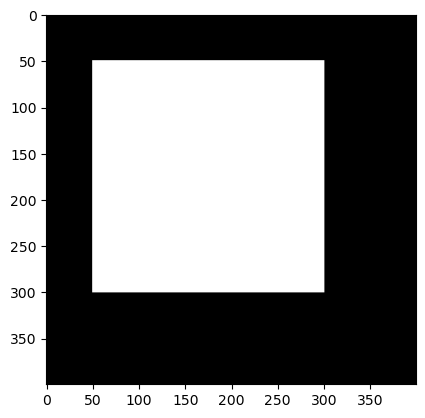

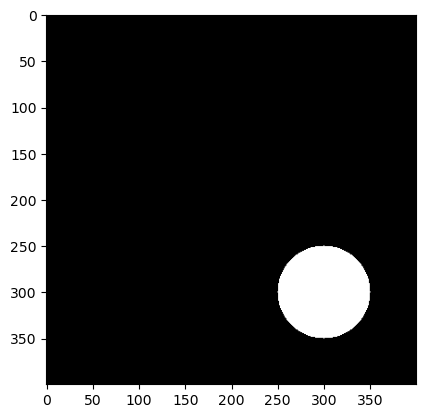

In [5]:
#비트 연산, 1과 0

import numpy as np

#사각형 임시데이터 생성
img_rectangle = np.ones((400,400), dtype = 'uint8')
cv2.rectangle(img_rectangle, (50,50), (300,300), (255,255,255), -1)

#원 임시 데이터 생성
img_circle = np.ones((400,400), dtype = 'uint8')
cv2.circle(img_circle, (300,300), 50, (255,255,255), -1)

plt.imshow(img_rectangle, 'gray')
plt.show()

plt.imshow(img_circle, 'gray')
plt.show()

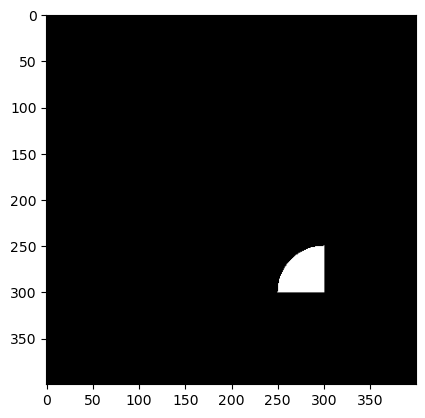

In [6]:
# A data(직사각형), B data(원) 로 and / or / xor / not 생성하기.

# and(교집합)

bitwiseAnd = cv2.bitwise_and(img_rectangle, img_circle)

plt.imshow(bitwiseAnd, 'gray')
plt.show()

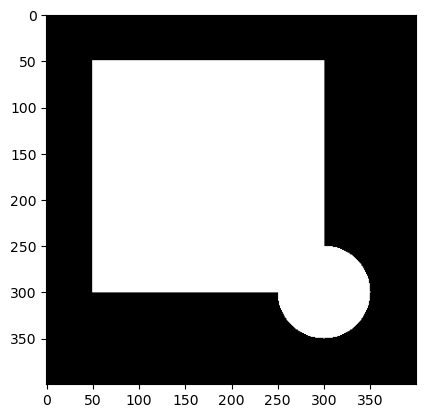

In [7]:
# OR(합집합)

bitwiseOR = cv2.bitwise_or(img_rectangle, img_circle)

plt.imshow(bitwiseOR, 'gray')
plt.show()

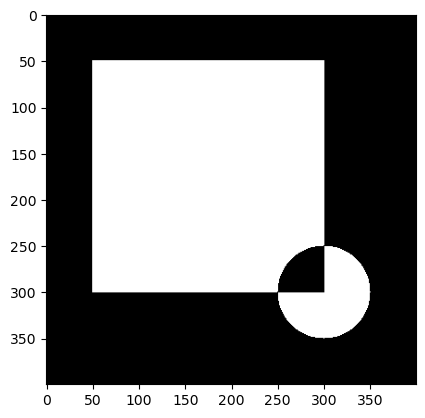

In [8]:
# XOR

bitwise_XOR = cv2.bitwise_xor(img_rectangle, img_circle)

plt.imshow(bitwise_XOR, 'gray')
plt.show()

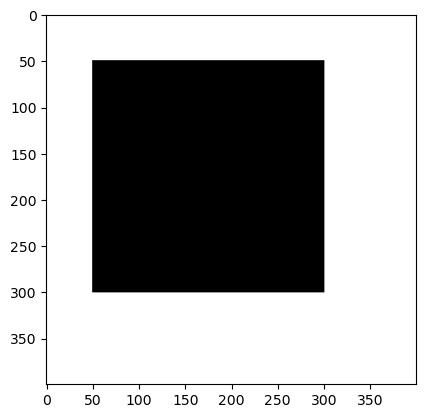

In [9]:
bitwiseNot_rec = cv2.bitwise_not(img_rectangle)

plt.imshow(bitwiseNot_rec, 'gray')
plt.show()

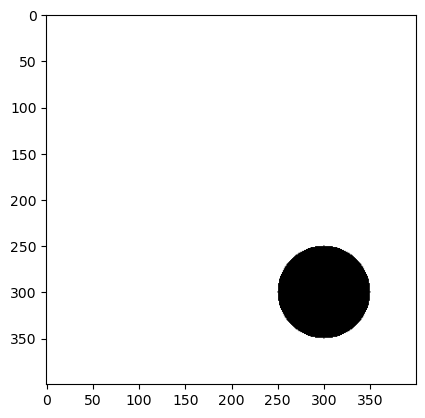

In [10]:
bitwiseNot_circle = cv2.bitwise_not(img_circle)

plt.imshow(bitwiseNot_circle, 'gray')
plt.show()

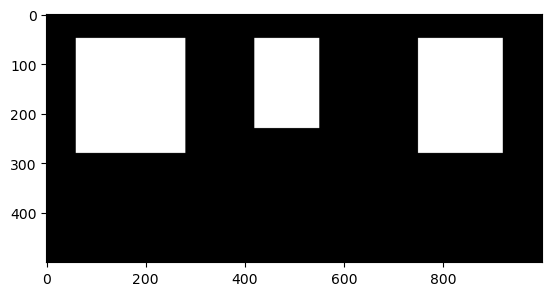

In [11]:
#masking

img_rectangle_temp = np.ones((500, 1000), dtype = 'uint8')

mask_ = np.zeros(img_rectangle_temp.shape, dtype = 'uint8')

#직사각형 안에 흰 직사각형 추가
cv2.rectangle(mask_, (60,50), (280, 280), (255,255,255), -1)
cv2.rectangle(mask_, (420,50), (550, 230), (255,255,255), -1)
cv2.rectangle(mask_, (750,50), (920, 280), (255,255,255), -1)

plt.imshow(mask_, 'gray')
plt.show()

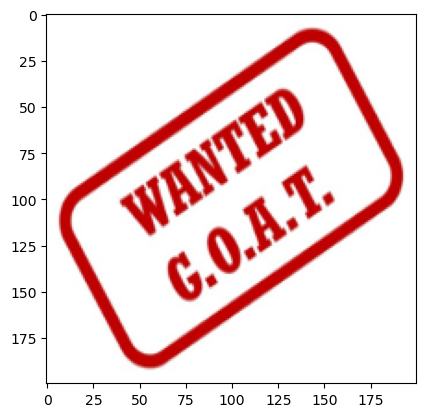

In [12]:
#블렌딩 없이 이미지 붙여넣기

sample_img = cv2.imread('../Data/ex_image.png')
sample_logo = cv2.imread('../Data/ex_image_logo.png')

sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
sample_logo = cv2.cvtColor(sample_logo, cv2.COLOR_BGR2RGB)

img1 = cv2.resize(sample_img, (800,600))
img2 = cv2.resize(sample_logo, (800,600))

small_img = cv2.resize(img2, (200,200))
plt.imshow(small_img)
plt.show()

In [13]:
#ppt 210p 참조(공식 있음.)
#다시 해보기.

x_offset = 39
y_offset = 150

x_end = x_offset + sample_img.shape[1]
y_end = y_offset + sample_img.shape[0]

img1[y_offset:y_end, x_offset:x_end] = small_img

plt.imshow(small_img)
plt.show()

ValueError: could not broadcast input array from shape (200,200,3) into shape (189,283,3)

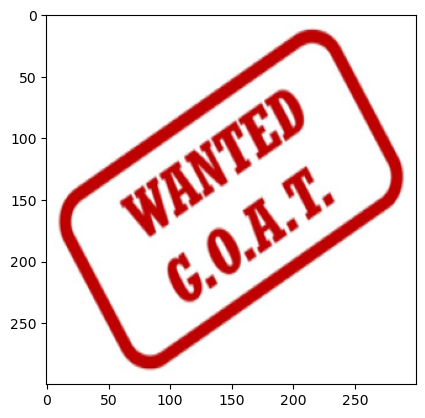

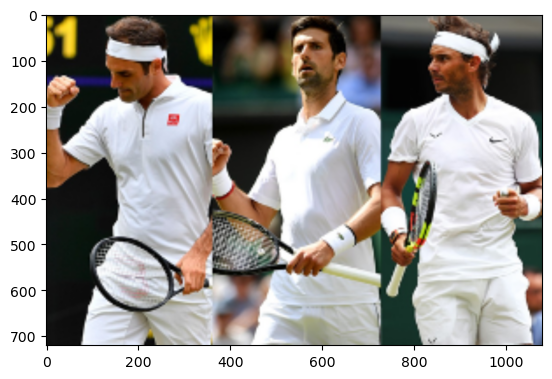

In [14]:
#최종 실습을 위한 이미지 로드

sample_img = cv2.imread('../Data/ex_image.png')
sample_logo = cv2.imread('../Data/ex_image_logo.png')

img_ = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
watermark = cv2.cvtColor(sample_logo, cv2.COLOR_BGR2RGB)

#watermark resize(200*200)
small_img_ = cv2.resize(watermark, (300,300))

#image resize
resize_img = cv2.resize(img_, (1080, 720))

plt.imshow(small_img_)
plt.show()

plt.imshow(resize_img)
plt.show()

이미지 크기>> 300 300


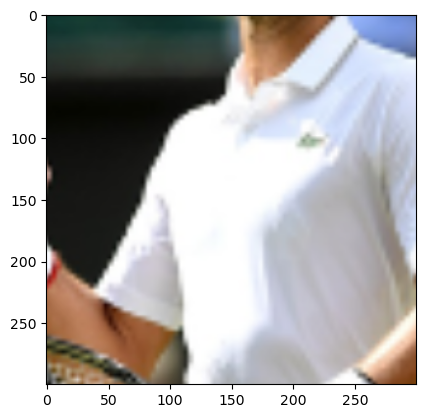

In [15]:
#image 정보 가져오기

height, width, _ = small_img_.shape
print('이미지 크기>>', height, width)

x_offset = 400
y_offset = 170

roi = resize_img[y_offset : 470, x_offset : 700]
plt.imshow(roi)
plt.show()

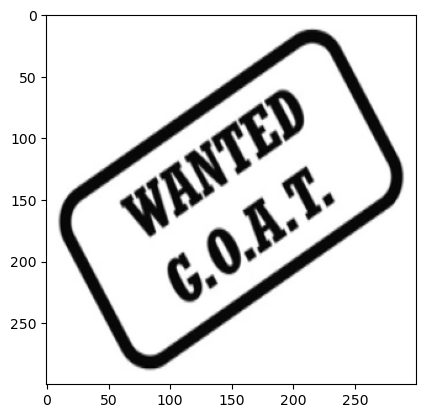

In [16]:
#logo 이미지 grayscale
small_img_gray = cv2.cvtColor(small_img_, cv2.COLOR_RGB2GRAY)

ret, mask = cv2.threshold(small_img_gray, 120, 255, cv2.THRESH_BINARY)

bg = cv2.bitwise_or(roi, roi, mask = mask)

plt.imshow(small_img_gray, 'gray')
plt.show()


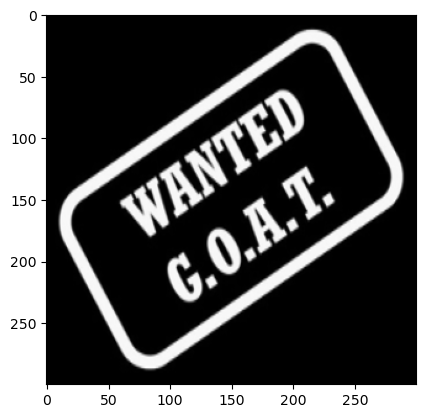

In [17]:
#not 사용하여 반전시키기

mask_inv = cv2.bitwise_not(small_img_gray)

plt.imshow(mask_inv, 'gray')
plt.show()

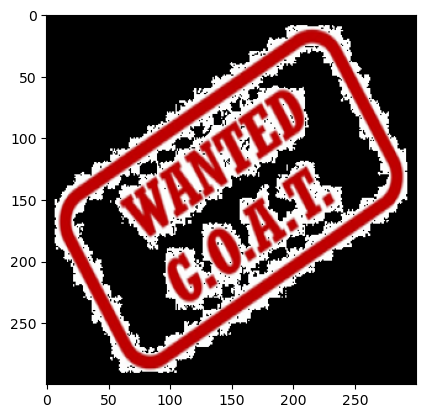

In [18]:
fg = cv2.bitwise_and(small_img_, small_img_, mask = mask_inv)

plt.imshow(fg)
plt.show()

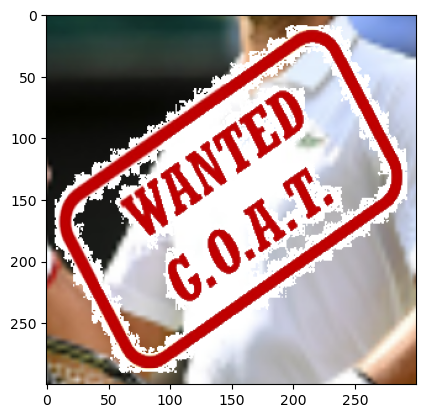

In [19]:
final_roi = cv2.add(bg, fg)
plt.imshow(final_roi)
plt.show()

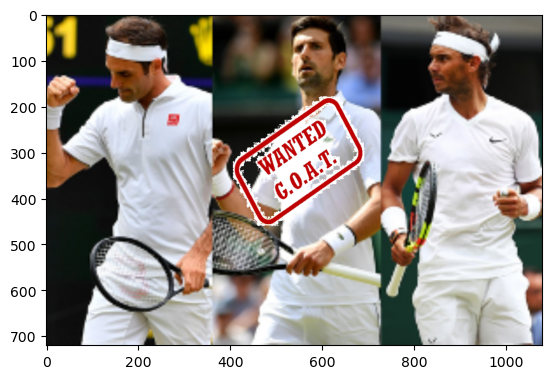

In [21]:
small_img_ = final_roi
resize_img[y_offset:y_offset+small_img_.shape[0], x_offset:x_offset+small_img_.shape[1]] = small_img_
plt.imshow(resize_img)
plt.show()